In [1]:
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # Menambahkan GridSearchCV/RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE


# Statistical Libraries
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

Dimulai dengan meng-import dataset sebagai DataFrame dengan Pandas, serta melihat 5 baris pertama dengan head() method.
Lalu, melakukan pembersihan kolom yang tidak relevan dengan tujuan proyek.

In [3]:
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # Menambahkan GridSearchCV/RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE


# Statistical Libraries
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# --- 1. Memuat Data (Loading Data) ---
# Memuat dataset Churn_Modelling.csv
# Pastikan file 'Churn_Modelling.csv' berada di direktori yang sama dengan notebook ini,
# atau sediakan path lengkap ke file tersebut.
try:
    df = pd.read_csv('Churn_Modelling.csv')
    print("Dataset berhasil dimuat!")
    print(df.head())
except FileNotFoundError:
    print("Error: File 'Churn_Modelling.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    # Exit atau tangani error lebih lanjut jika file tidak ada
    exit()

# Menampilkan informasi dasar dataset
print("\n--- Informasi Dataset ---")
df.info()

# Menampilkan statistik deskriptif
print("\n--- Statistik Deskriptif ---")
print(df.describe().T) # Menggunakan .T agar lebih mudah dibaca

Dataset berhasil dimuat!
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.6

In [6]:
# --- 2. Pembersihan dan Persiapan Data Awal (Initial Data Cleaning and Preparation) ---

# Menghapus kolom yang tidak relevan untuk prediksi churn
# 'RowNumber', 'CustomerId', 'Surname' biasanya tidak memberikan informasi prediktif
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print("\nKolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.")

# Mengidentifikasi missing values
print("\n--- Melakukan pengecekan terhadap missing values ---")
print(df.isnull().sum())
# Untuk dataset ini, sepertinya tidak ada missing values, tapi langkah ini penting


# --- 3. Identifikasi Variabel Kategorikal dan Numerik ---
# Variabel kategorikal
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'] 
# Variabel numerik (kontinu)
numerical_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

print(f"\nVariabel Kategorikal: {list(categorical_features)}")
print(f"Variabel Numerik : {list(numerical_features)}")


Kolom 'RowNumber', 'CustomerId', 'Surname' berhasil dihapus.

--- Melakukan pengecekan terhadap missing values ---
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Variabel Kategorikal: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
Variabel Numerik : ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']


## Exploratory Data Analysis


--- Distribusi Variabel Target (Exited) ---
Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


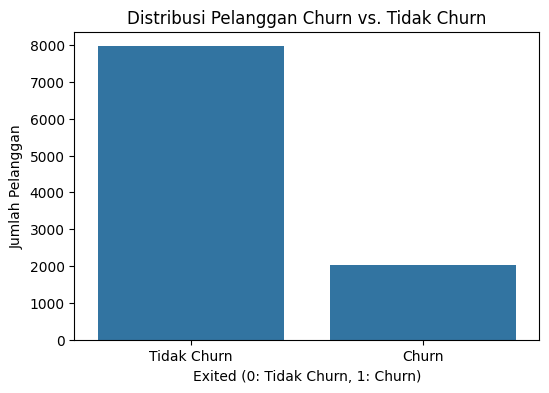

In [7]:
# --- 3. Eksplorasi Data Awal (Initial Exploratory Data Analysis - EDA) ---

# Analisis distribusi variabel target (Exited)
print("\n--- Distribusi Variabel Target (Exited) ---")
print(df['Exited'].value_counts())
print(df['Exited'].value_counts(normalize=True) * 100) # Persentase churn

# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Pelanggan Churn vs. Tidak Churn')
plt.xlabel('Exited (0: Tidak Churn, 1: Churn)')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tidak Churn', 'Churn'])
plt.show()

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print('Train set: {} rows x {} columns'.format(train_df.shape[0],
                                               train_df.shape[1]))
print(' Test set: {} rows x {} columns'.format(test_df.shape[0],
                                               test_df.shape[1]))

Train set: 8000 rows x 11 columns
 Test set: 2000 rows x 11 columns


In [10]:
train_df['Exited'].value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64